####Tech Layoffs Analysis


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 – Basic Data Understanding (Pandas)

Load the CSV file into a Pandas DataFrame.


Display the first 10 rows.


Show shape, column names, and data types.


Check for missing values and duplicates.


Use .describe() to get summary statistics.


In [8]:
df=pd.read_csv('tech_layoffs.csv')
display(df.head(10))

,company,company_size,employees_fired
0,Apple,147000,0
1,Microsoft,181000,6000
2,Google,139500,15000
3,Amazon,1300000,12000
4,Facebook,60750,11000
5,Tesla,70000,1000
6,Palantir,1008569,72661
7,PhonePe,850789,89997
8,Ola,135654,3909
9,Oracle,1116585,50166


In [9]:
print("shape: ",df.shape)
print("column names: ",df.columns)
print("data types: \n",df.dtypes)

shape:  (100, 3)
column names:  Index(['company', 'company_size', 'employees_fired'], dtype='object')
data types: 
 company            object
company_size        int64
employees_fired     int64
dtype: object


In [10]:
df.isnull().sum()

company            0
company_size       0
employees_fired    0
dtype: int64

In [11]:
df.drop_duplicates(subset=['company'], keep='first', inplace=True)
print(df.company.duplicated().sum())

0


In [12]:
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,company_size,employees_fired
count,4.900000e+01,49.000000
mean,7.271658e+05,61471.857143
std,4.773233e+05,52253.894597
min,7.137000e+03,0.000000
25%,2.666560e+05,15000.000000
50%,7.980650e+05,44492.000000
75%,1.176096e+06,107657.000000
max,1.432228e+06,206083.000000


# Part 2 – Data Cleaning
Ensure company_size and employees_fired are stored as integers.


Remove any extra spaces in company names.


Check for any negative values in employees_fired or company_size and correct them if needed.


Standardize company names to title case.


In [13]:
print("data types: \n",df.dtypes)
print("data type of all columnss are integers")

data types: 
 company            object
company_size        int64
employees_fired     int64
dtype: object
data type of all columnss are integers


In [14]:
df.company=df.company.str.strip()

In [15]:
df.employees_fired=df.employees_fired.abs()
df.company_size=df.company_size.abs()
df.company=df.company.str.title()
df.head()

,company,company_size,employees_fired
0,Apple,147000,0
1,Microsoft,181000,6000
2,Google,139500,15000
3,Amazon,1300000,12000
4,Facebook,60750,11000


# Part 3 – Exploratory Data Analysis (EDA)

Calculate the total number of employees across all companies.


Calculate the total number of employees laid off across all companies.


Find the company with the highest number of layoffs.


Find the company with the highest layoff percentage.


Create a bar chart of layoffs per company.




In [16]:
te=df.company_size.sum()
print("total number of employees across all companies: ",te)

total number of employees across all companies:  35631126


In [17]:
tf=df.employees_fired.sum()
print("total number of employees laid off across all companies: ",tf)

total number of employees laid off across all companies:  3012121


In [18]:
maxi=np.where(df.employees_fired==df.employees_fired.max())
maxi=df.iloc[maxi[0]]['company']
print("company with the highest number of layoffs: ",maxi)

company with the highest number of layoffs:  63    Makemytrip
Name: company, dtype: object


In [19]:
df['layoff_percentage'] = (df['employees_fired'] / df['company_size']) * 100
df.layoff_percentage= df['layoff_percentage'].round(2)
df.head()

,company,company_size,employees_fired,layoff_percentage
0,Apple,147000,0,0.00
1,Microsoft,181000,6000,3.31
2,Google,139500,15000,10.75
3,Amazon,1300000,12000,0.92
4,Facebook,60750,11000,18.11


In [20]:
mper=np.where(df.layoff_percentage==df.layoff_percentage.max())
mper=df.iloc[mper[0]]['company']
print("company with the highest layoff percentage: ",mper)

company with the highest layoff percentage:  4    Facebook
Name: company, dtype: object


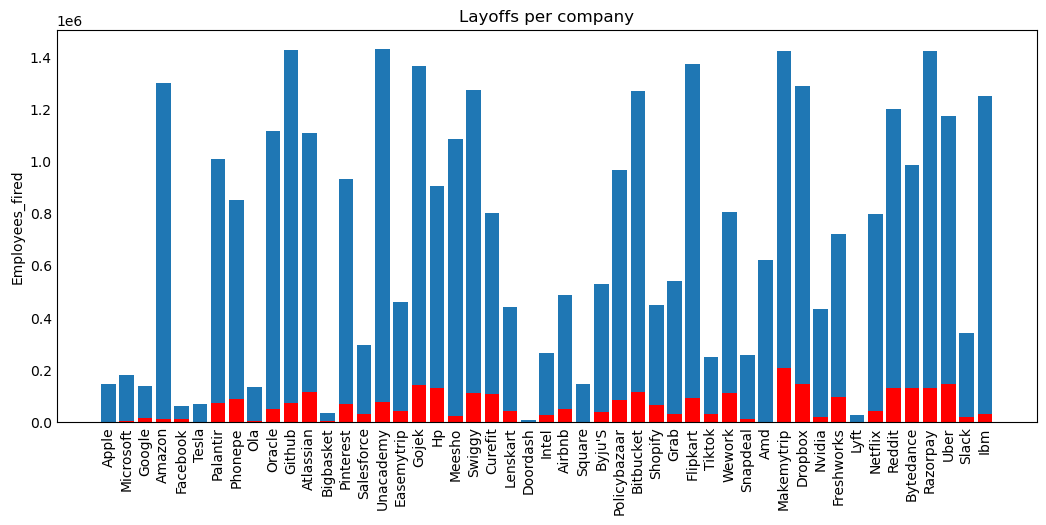

In [21]:
plt.style.use('_mpl-gallery-nogrid')
figure=plt.figure(figsize=(10,4))
plt.bar(df.company,df.company_size)
plt.bar(df.company,df.employees_fired,color='red')
plt.ylabel('Employees_fired')
plt.xticks(rotation=90)
plt.title('Layoffs per company')
plt.show()

# Part 4 – Statistics

Calculate mean, median, variance, and standard deviation of employees_fired.


Find the probability that a company laid off more than 5% of its employees.


Find the percentage of companies with layoffs greater than 10,000 employees.




In [22]:
mean=df.employees_fired.mean()
print("mean: ",mean)

mean:  61471.857142857145


In [23]:
median=df.employees_fired.median()
print("median: ",median)

median:  44492.0


In [24]:
variance=df.employees_fired.var()
print("variance: ",variance)

variance:  2730469500.541666


In [25]:
std=df.employees_fired.std()
print("standard deviation: ",std)

standard deviation:  52253.89459687829


In [26]:
prob=df.employees_fired.where(df.employees_fired>df.company_size*0.05).count()/df.employees_fired.count()
print("more than 5% of its employees: ",prob)

more than 5% of its employees:  0.7551020408163265


In [27]:
percent=df.company.where(df.employees_fired>10000).count()*100/df.company.count()
print("percent of company layoffs greater than 10,000 employees: ",percent)

percent of company layoffs greater than 10,000 employees:  81.63265306122449


# Part 5 – Linear Algebra & NumPy

Convert company_size and employees_fired into NumPy arrays.


Perform vector subtraction (company_size - employees_fired).


Compute the dot product of company_size and employees_fired.


Perform matrix multiplication:


Features = [company_size, employees_fired]


Weights = [0.4, 0.6]




In [28]:
company_size=np.array(df.company_size)
employees_fired=np.array(df.employees_fired)

In [29]:
suba=np.subtract(company_size,employees_fired)
print(suba)

[ 147000  175000  124500 1288000   49750   69000  935908  760792  131745
 1066419 1352793  994003   30491  863306  267871 1353189  417025 1221817
  774780 1062706 1164609  692776  399988    6983  241174  438978  143290
  488362  884860 1154419  382955  511345 1279231  218193  694008  242547
  620902 1217981 1142083  415674  623979   26647  755528 1071940  854125
 1292019 1028681  321119 1218514]


In [30]:
dotp=np.dot(company_size,employees_fired)
print(dotp)

3099929330806


In [31]:
Features = np.array([df['company_size'], df['employees_fired']]).T
Weights = np.array([0.4, 0.6])
mamul = np.matmul(Features, Weights)
print(mamul)

[ 58800.   76000.   64800.  527200.   30900.   28600.  447024.2 394313.8
  56607.  476733.6 616123.2 511744.2  17219.4 416262.4 137047.4 620314.6
 211302.  632359.8 440507.  446916.4 576151.6 384767.4 202479.2   2947.2
 121951.6 225945.2  58985.  236041.8 437796.  576155.6 219788.  235099.
 604786.4 118849.2 388491.2 110654.8 250420.8 693275.4 603855.2 185655.6
 346983.6  12938.8 344748.2 558538.  473243.  649321.6 558887.4 149956.6
 520234.6]


# Part 6 – Feature Engineering
Create a new column Layoff_Percentage = (employees_fired / company_size) * 100 (rounded to 2 decimal places).


Create a High_Layoff column (1 if Layoff_Percentage > 5, else 0).


Rank companies into quartiles based on Layoff_Percentage.




In [32]:
layoff_percentage = np.array(df.layoff_percentage)


In [33]:
df['High_Layoff']=np.where(layoff_percentage>5,1,0)
df.High_Layoff=df['High_Layoff'].astype(int)
df.head()

,company,company_size,employees_fired,layoff_percentage,High_Layoff
0,Apple,147000,0,0.00,0
1,Microsoft,181000,6000,3.31,0
2,Google,139500,15000,10.75,1
3,Amazon,1300000,12000,0.92,0
4,Facebook,60750,11000,18.11,1


In [34]:
df['Layoff_Quartile'] = pd.qcut(df['layoff_percentage'], q=4, labels=False)
df.tail()

,company,company_size,employees_fired,layoff_percentage,High_Layoff,Layoff_Quartile
81,Bytedance,985718,131593,13.35,1,3
85,Razorpay,1424533,132514,9.30,1,2
87,Uber,1176096,147415,12.53,1,3
90,Slack,342628,21509,6.28,1,1
93,Ibm,1251343,32829,2.62,0,0


# Part 7 – SQL Simulation in Pandas

Select all companies with Layoff_Percentage > 5 and order them by Layoff_Percentage descending.


Get the top 3 companies with the highest layoff counts.


Sort companies alphabetically and show company and Layoff_Percentage.

In [35]:
h=df.groupby('High_Layoff').get_group(1).sort_values(by='layoff_percentage',ascending=False).reset_index(drop=True)

In [36]:
display(h.head(3))

,company,company_size,employees_fired,layoff_percentage,High_Layoff,Layoff_Quartile
0,Facebook,60750,11000,18.11,1,3
1,Shopify,449561,66606,14.82,1,3
2,Makemytrip,1424064,206083,14.47,1,3


In [37]:
df.sort_values(by='company',ascending=True,inplace=True)
df['company']=df['company'].str.title()
df[['company','layoff_percentage']]

,company,layoff_percentage
29,Airbnb,10.29
3,Amazon,0.92
56,Amd,0.33
0,Apple,0.00
11,Atlassian,10.30
13,Bigbasket,14.14
35,Bitbucket,9.02
32,Byju'S,7.69
81,Bytedance,13.35
24,Curefit,13.45


# Part 8 – Insights

Which company had the highest layoffs in percentage terms?


Which company had the most employees fired in absolute numbers?


What is the average layoff percentage across all companies?


Which quartile of Layoff_Percentage has the highest average company_size?




In [38]:
print("company with the highest layoffs in percentage terms: ",h['company'].head(1))

company with the highest layoffs in percentage terms:  0    Facebook
Name: company, dtype: object


In [39]:
print("company with the most employees fired in absolute numbers: ",df.company[df.employees_fired.idxmax()])

company with the most employees fired in absolute numbers:  Makemytrip


In [40]:
print("avg layoff percentage across all companies: ",df.layoff_percentage.mean())

avg layoff percentage across all companies:  8.17469387755102


In [41]:
print("quartile of Layoff_Percentage has the highest average company_size: ",df.Layoff_Quartile.value_counts().idxmax())

quartile of Layoff_Percentage has the highest average company_size:  0


In [42]:
df.head(10)

,company,company_size,employees_fired,layoff_percentage,High_Layoff,Layoff_Quartile
29,Airbnb,489332,50354,10.29,1,2
3,Amazon,1300000,12000,0.92,0,0
56,Amd,622962,2060,0.33,0,0
0,Apple,147000,0,0.00,0,0
11,Atlassian,1108146,114143,10.30,1,2
13,Bigbasket,35514,5023,14.14,1,3
35,Bitbucket,1268807,114388,9.02,1,2
32,Byju'S,529059,40697,7.69,1,1
81,Bytedance,985718,131593,13.35,1,3
24,Curefit,800433,107657,13.45,1,3


##My Insights

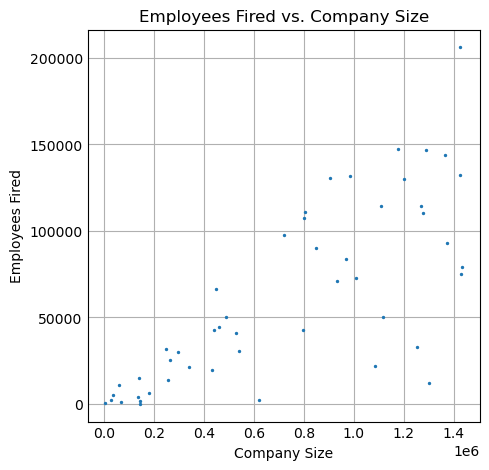

In [43]:
plt.figure(figsize=(4,4))
plt.scatter(df['company_size'],df['employees_fired'],s=2)
plt.title('Employees Fired vs. Company Size')
plt.xlabel('Company Size')
plt.ylabel('Employees Fired')
plt.grid(True)
plt.show()

In [44]:
df['company_size'].corr(df['employees_fired'])

np.float64(0.7597775059470279)

In [45]:
print(np.corrcoef(df.company_size,df.employees_fired) )

[[1.         0.75977751]
 [0.75977751 1.        ]]


In [46]:
print(np.cov(df.company_size,df.employees_fired) )

[[2.27837536e+11 1.89503717e+10]
 [1.89503717e+10 2.73046950e+09]]


covariance and correlation between company_size and layoff_percentage is high showing they are directly related and directly propotional

In [47]:
df.shape

(49, 6)

# feature engineering

In [49]:
t=pd.read_csv('tech_layoffs.csv')
t.shape

(100, 3)